# COGS 108, Group024 - Final Project

# Overview

*For the final project, our team decided to focus on the degree to which large and small companies provide mental health programs. Initially, we concentrated on separating the columns of our data not only by size but also by attributes like gender, company location, self employment, and age to see if there were any confounding variables in our data. Our data was mainly self reported so we used sentiment analysis to determine whether participants were mentally healthy or not. After analyzing our data, our team decided that the size of the company impacted mental health to a lesser extent than wellness programs that the company provided for its employees.*

# Names

- Andrey Pristinsky
- Mariam Qader
- Cole Richmond
- Braden Riggs
- Taly Yukelson

# Research Question

In the process of developing new solutions to create economic or social impact, the burden of being a part of a small team, working long hours, and having to meet deadlines can become overwhelming. While many young, bright minds aspire to land jobs at the most prestigious technology companies, the payoff might be short-lived as employees sacrifice their mental well-being for high levels of productivity in their pursuit to “make it”. In short, **our group wants to know if there exists a correlation between an employee’s mental health and the size of the company they work for**. While small technology companies may provide their employees the opportunity for more freedom and power to impact their companies, ultimately the high expectations may be too much to handle for many of them.

## Background and Prior Work

In his article, “Why Startups Are Harder than MIT,” Riz Virk discusses that while a startup allows its employees to impact the success of the company, ultimately the lack of stability gives rise to a high intensity climate, thus raising anxiety levels. Virk asserts that because the success of a startup depends less on the work of individuals and more on the market or a “lucky break,” lots of employees are kept in high stress situations for prolonged amounts of time causing a negative impact on their mental health. From Virk’s article, our team gathered that startups would be more detrimental to employee mental health as the environments they promote are more stressful than those at bigger companies. We want to look more into whether it is the devices that bigger companies put out for their employees or if it is the culture of the companies themselves that impact employee mental health. $^{(1)}$

The technology industry fosters a high-stress environment that lacks supportive groups that help fight the mental health stigma. More employees are becoming more aware of company culture and prioritizing a work-life balance. Experts agree that the high stress fast paced environment is having an adverse effect on tech professionals’ mental health and that both large and small companies should be doing more to remedy this. $^{(2)}$


References (include links):
- 1) https://medium.com/swlh/why-startups-are-harder-than-mit-stress-and-the-entrepreneur-part-1-of-2-2168d1ab41d7
- 2) https://www.mente.co.uk/2019/11/21/mental-health-in-the-tech-industry/

# Hypothesis

*Given our preliminary research, it is hypothesized that small tech companies will on average have a lower rate of job satisfaction and a worsened sense of mental well being than larger corporate enterprises.*
 
*We believe that small tech companies will have a lower rate of job satisfaction because these companies offer high stress projects that force individuals to work overtime as their work has a greater impact on the company, while a big company provides its employees a standard 9-5 job that has more balance, leading to higher satisfaction.*


# Dataset(s)

### DataSet #1
**Dataset Name**: OSMI Mental Health in Tech Survey: Raw Data 2014-2018

**Link to the dataset**: https://www.kaggle.com/ekwiecinska96/mental-health-in-techology-survey-2014-and-2016

**Number of observations**: 3,866

### DataSet #2
**Dataset Name**: OSMI Mental Health in Tech Survey 2019

**Link to the dataset**: https://www.kaggle.com/osmihelp/osmi-mental-health-in-tech-survey-2019

**Number of observations**: 352


*The datasets we chose to use are from the mental health in tech survey conducted every year, except for 2015, by Open Sourcing Mental Illness (OSMI). This survey contains answers from tech workers about their own mental health, as well as how the company handles mental health in general. Each survey’s questions are a little different so we are going to combine all 5 of the years we have on all of the questions (columns) that are the same.*


# Setup

In [1]:
import numpy as np
import pandas as pd
import os
import time
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from urllib.request import Request, urlopen
import string
import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from collections import Counter, defaultdict

# grab stopwords for sentiment analysis
stoplist = stopwords.words('english')

### Data Imports

In [2]:
# read in survey data
survey2014 = pd.read_csv('data/survey_2014.csv')
survey2016 = pd.read_csv('data/survey_2016.csv')
survey2017 = pd.read_csv('data/survey_2017.csv')
survey2018 = pd.read_csv('data/survey_2018.csv')
survey2019 = pd.read_csv('data/survey_2019.csv')                

### Exploratory Data Analysis

In [3]:
# number of respondents per survey
print('Number of Respondents per Survey: \n \
       2014: {} \n \
       2016: {} \n \
       2017: {} \n \
       2018: {} \n \
       2019: {}'.format(survey2014.shape[0], 
                        survey2016.shape[0], 
                        survey2017.shape[0], 
                        survey2018.shape[0], 
                        survey2019.shape[0]))

Number of Respondents per Survey: 
        2014: 1259 
        2016: 1433 
        2017: 756 
        2018: 417 
        2019: 352


In [4]:
# number of attributes in each survey
print('Number of Columns per Survey: \n \
       2014: {} \n \
       2016: {} \n \
       2017: {} \n \
       2018: {} \n \
       2019: {}'.format(survey2014.shape[1], 
                        survey2016.shape[1], 
                        survey2017.shape[1], 
                        survey2018.shape[1], 
                        survey2019.shape[1]))

Number of Columns per Survey: 
        2014: 27 
        2016: 63 
        2017: 123 
        2018: 123 
        2019: 82


#### Survey - 2014

In [5]:
#Drop mental_health_consequence/phy_health_consequence/obs_consequence/timestamp/mental_vs_physical/remote_work from 2014 table (not present in other years)
survey2014 = survey2014.drop(['Timestamp', 'mental_health_consequence', 'phys_health_consequence', 'obs_consequence', 'mental_vs_physical', 'remote_work'], axis=1)


In [6]:
#add null columns for 'how to improve' to 2014 (present in other datasets)
survey2014['how to improve?'] = np.nan

In [7]:
#Rename columns to match the rest of the surveys
survey2014 = survey2014.rename(columns={"no_employees": "num_employees"})

#### Survey - 2016

In [8]:
#Shortening all 2016 column names
survey2016.columns = ('self_employed', 'num_employees', 'tech_company', 'prime_role_tech?', 'benefits', 
                      'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
                      'phys_health_consequence', 'coworkers', 'supervisor', 'mental_vs_physical', 'obs_consequence',
                     'have_med_coverage_w/MH?', 'know_local/online_resources_forMH?',
                      'reveal_MHdisorder_to_clients/businessContacts?', 'client_prevQ_impacted_negatively?',
                      'reveal_MHdisorder_to_coworkers/employees?', 'coworker_prevQ_impacted_negatively?',
                      'MH_affected_productivity?', 'prevQ_YES_%worktime_affected', 'PREV_employers?', 'PREV_benefits',
                      'PREV_care_options', 'PREV_wellness_program', 'PREV_seek_help', 'PREV_anonymity', 'PREV_leave',
                      'PREV_mental_health_consequence', 'PREV_phys_health_consequence', 'PREV_coworkers',
                      'PREV_supervisor', 'PREV_mental_vs_physical', 'PREV_obs_consequence', 'phys_health_interview',
                      'phys_prevQ_WHY', 'mental_health_interview', 'mental_prevQ_WHY', 'MH_identified_hurt_career?',
                      'MH-know_co-workers_view_negatively?' 'how_willing_sharing_MH_w/_friends/family?',
                      'bad_response_toMH_issue_curr/prev_workplace?', 'prev_obs_onMH_lessLikelyReveal_curr_MH_issue?',
                      'family_history', 'MH_disorder_past?', 'MH_disorder_currently?', 'prevQ_YES_diagnosed_condition?',
                      'prevQ_MAYBE_believed_condition?', 'diagnosedMH_by_MDProfessional?', 'prevQ_condition_diagnosed?',
                      'treatment', 'work_interfere_treated', 'work_interfere_not_treated', 'Age', 'Gender', 'Country',
                      'state', 'Country_work', 'state_work', 'work_position', 'remote_work')

In [9]:
#Select Columns from 2016 we want to use
survey2016 = survey2016[['Age', 'Gender', 'Country', 'state', 'self_employed', 'family_history',
                         'diagnosedMH_by_MDProfessional?', 'MH_affected_productivity?','num_employees',
                         'tech_company','benefits','care_options', 'wellness_program', 'seek_help', 
                         'anonymity', 'leave','coworkers', 'supervisor', 'mental_health_interview', 
                         'phys_health_interview']]
#Rename 2016 columns to match the rest of surveys
survey2016 = survey2016.rename(columns={"diagnosedMH_by_MDProfessional?": "treatment", "MH_affected_productivity?": "work_interfere"})

In [10]:
#add null columns for 'how to improve' and 'comments' to 2016 (present in other datasets)
survey2016['how to improve?'] = np.nan
survey2016['comments'] = np.nan

#### Survey - 2017

In [11]:
#drop all unnecessary columns in 2017, not present in other surveys or to our research
survey2017 = survey2017.drop(['#'], axis = 1)
#Previous Emplpoyer Information
survey2017 = survey2017.drop(survey2017.iloc[:, 29:47], axis = 1) 
#Specific MH disorder information
survey2017 = survey2017.drop(survey2017.iloc[:, 31:70], axis = 1) 

In [12]:
#Shortening all 2017 column names
survey2017.columns = ('self_employed', 'no_employees', 'tech_company', 'prime_role_tech?', 'benefits', 
                      'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'coworkers', 
                      'supervisor','mh_with_employer','employer_conversation_MH','MH_coworkers_comfort',
                      'MH_coworkers','coworker_conversation_MH','MH_from_coworker', 'from_coworkers_MH_conversation',
                      'PH_importance','MH_importance', 'have_med_coverage_w/MH?','know_local/online_resources_forMH?',
                      'reveal_MHdisorder_to_clients/businessContacts?', 'client_prevQ_impacted_negatively?',
                      'reveal_MHdisorder_to_coworkers/employees?', 'coworker_prevQ_impacted?','MH_affected_productivity?',
                      'prevQ_YES_%worktime_affected','have_MH_disorder?','diagnosed_MH_disorder?', 
                      'MH_disorder_past','treatment_from_professional?', 'family_history', 'MH_interferes_work_treated', 
                      'MH_interferes_work_untreated','observations_of_coworkers', 'willingness to share MH issues w Friends/Family',
                      'willingness to share PH issues with employer in interview','prevQ_why?',
                      'willingness to share MH issues with employer in interview',
                      'prevQ_why?','openly_identified_with_MH', 'prevQ_effect','prevQ_how', 
                      'reaction from coworkers','unsupportive responses?','prevQ_circumstances',
                      'supportive response?','prevQ_circumstances', 'tech industry supports MH?', 
                      'how to improve?', 'comments', 'more?', 'age', 'gender', 'country','state','race','other',
                     'country_work', 'state_work', 'start_date', 'submit_date', 'networkID')

In [13]:
#Select Columns from 2017 we want to use
survey2017 = survey2017[['age', 'gender', 'country', 'state', 'self_employed', 'family_history',
                         'treatment_from_professional?', 'MH_affected_productivity?','no_employees',
                         'tech_company','benefits','care_options', 'wellness_program', 'seek_help', 
                         'anonymity', 'leave', 'MH_importance', 'PH_importance', 'MH_coworkers_comfort', 
                         'supervisor', 'willingness to share MH issues with employer in interview', 
           'willingness to share PH issues with employer in interview', 'how to improve?', 'comments']]
#Rename 2017 columns to match the rest of surveys
survey2017 = survey2017.rename(columns={"age": "Age", "country":"Country","MH_affected_productivity?": "work_interfere",
                                        'gender':'Gender','treatment_from_professional?':'treatment', 'no_employees':'num_employees',
                                        'MH_coworkers_comfort':'coworkers', 'willingness to share MH issues with employer in interview': 
                                        'mental_health_interview','willingness to share PH issues with employer in interview': 'phys_health_interview'})


In [14]:
#Drop MH_importance and PH_importance from 2017 (not present in other years)
survey2017 = survey2017.drop(['MH_importance', 'PH_importance'], axis=1)

#### Survey - 2018

In [15]:
#drop all unnecessary columns in 2018, not present in other surveys or to our research
survey2018 = survey2018.drop(['#'], axis = 1)
#drop all previous employer questions, not relevant to our research
survey2018 = survey2018.drop(survey2018.iloc[:, 29:47], axis = 1) 
#drop specific mental health disorder info, not relevant to our research
survey2018 = survey2018.drop(survey2018.iloc[:, 31:70], axis = 1) 

In [16]:
#Shortening all 2018 column names
survey2018.columns = ('self_employed', 'no_employees', 'tech_company', 'prime_role_tech?', 'benefits', 
                      'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 
                      'coworkers', 'supervisor','mh_with_employer','employer_conversation_MH',
                      'MH_coworkers_comfort', 'MH_coworkers','coworker_conversation_MH','MH_from_coworker', 
                      'from_coworkers_MH_conversation','PH_importance', 'MH_importance', 
                      'have_med_coverage_w/MH?','know_local/online_resources_forMH?',
                      'reveal_MHdisorder_to_clients/businessContacts?','client_prevQ_impacted_negatively?',
                      'reveal_MHdisorder_to_coworkers/employees?', 'coworker_prevQ_impacted?',
                      'MH_affected_productivity?','prevQ_YES_%worktime_affected','have_MH_disorder?',
                      'diagnosed_MH_disorder?', 'MH_disorder_past','treatment_from_professional?', 
                      'family_history','MH_interferes_work_treated', 'MH_interferes_work_untreated',
                      'observations_of_coworkers','willingness to share MH issues w Friends/Family',
                      'willingness to share PH issues with employer in interview',
                      'prevQ_why?','willingness to share MH issues with employer in interview','prevQ_why?',
                      'openly_identified_with_MH', 'prevQ_effect', 'prevQ_how', 'reaction from coworkers',
                      'unsupportive responses?','prevQ_circumstances','supportive response?', 'prevQ_circumstances', 
                      'tech industry supports MH?', 'how to improve?', 'comments', 'more?', 'age', 'gender', 
                      'country','state','race','other','country_work', 'state_work', 'start_date', 'submit_date', 'networkID')                    

In [17]:
#Select Columns from 2018 we want to use
survey2018 = survey2018[['age', 'gender', 'country', 'state', 'self_employed', 'family_history',
                         'treatment_from_professional?', 'MH_affected_productivity?','no_employees',
                         'tech_company','benefits','care_options', 'wellness_program', 'seek_help', 
                         'anonymity', 'leave', 'MH_importance', 'PH_importance', 'MH_coworkers_comfort', 
                         'supervisor', 'willingness to share MH issues with employer in interview', 
           'willingness to share PH issues with employer in interview', 'how to improve?', 'comments']]

#Rename 2018 columns to match the rest of surveys
survey2018 = survey2018.rename(columns={"age": "Age", "country":"Country",
                                    "MH_affected_productivity?": "work_interfere", 'gender':'Gender',
                                       'treatment_from_professional?':'treatment', 'no_employees':'num_employees',
                                       'MH_coworkers_comfort':'coworkers', 'willingness to share MH issues with employer in interview': 'mental_health_interview',
                                       'willingness to share PH issues with employer in interview': 'phys_health_interview'})

In [18]:
#Drop MH_importance and PH_importance from 2018 table (not present in other years)
survey2018 = survey2018.drop(['MH_importance', 'PH_importance'], axis=1)

#### Survey - 2019

In [19]:
#drop all unnecessary columns in 2017, not present in other surveys or to our research
#drop all previous employer questions
survey2019 = survey2019.drop(survey2019.iloc[:, 29:47], axis = 1) 

In [20]:
#renamed all the 2019 columns to either match up with 2014 columns or just to shorten them
survey2019.columns = ('self_employed', 'no_employees', 'tech_company', 'prime_role_tech?', 'benefits', 
                      'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 
                      'coworkers', 'supervisor', 'mh_with_employer', 'employer_conversation_MH','MH_coworkers_comfort', 
                      'MH_coworkers','coworker_conversation_MH','MH_from_coworker', 'from_coworkers_MH_conversation','PH_importance', 
                      'MH_importance', 'have_med_coverage_w/MH?','know_local/online_resources_forMH?','reveal_MHdisorder_to_clients/businessContacts?', 
                      'client_prevQ_impacted_negatively?','reveal_MHdisorder_to_coworkers/employees?', 
                      'coworker_prevQ_impacted?','MH_affected_productivity?','prevQ_YES_%worktime_affected',
                      'have_MH_disorder?','diagnosed_MH_disorder?','diagnosed_disorders','possible_disorders', 
                      'diagnosed_disorders_again?','MH_disorder_past','treatment_from_professional?', 
                      'family_history', 'MH_interferes_work_treated', 'MH_interferes_work_untreated','observations_of_coworkers',
                      'willingness to share MH issues w Friends/Family','willingness to share PH issues with employer in interview',
                      'prevQ_why?','willingness to share MH issues with employer in interview',
                      'prevQ_why?','openly_identified_with_MH','prevQ_effect', 'prevQ_how', 
                      'reaction from coworkers','unsupportive responses?','prevQ_circumstances',
                      'supportive response?', 'prevQ_circumstances', 'tech industry supports MH?', 
                      'how to improve?', 'comments', 'more?', 'age', 'gender', 'country', 'state',
                      'race', 'country_work', 'state_work')
                    

In [21]:
#Select Columns from 2018 we want to use
survey2019 = survey2019[['age', 'gender', 'country', 'state', 'self_employed', 'family_history',
                         'treatment_from_professional?', 'MH_affected_productivity?','no_employees',
                         'tech_company','benefits','care_options', 'wellness_program', 'seek_help', 
                         'anonymity', 'leave', 'MH_importance', 'PH_importance', 'MH_coworkers_comfort', 
                         'supervisor', 'willingness to share MH issues with employer in interview', 
                         'willingness to share PH issues with employer in interview', 'how to improve?', 'comments']]
#Rename 2019 columns to match the rest of surveys
survey2019 = survey2019.rename(columns={"age": "Age", "country":"Country",
                                    "MH_affected_productivity?": "work_interfere", 'gender':'Gender',
                                       'treatment_from_professional?':'treatment', 'no_employees':'num_employees',
                                       'MH_coworkers_comfort':'coworkers', 'willingness to share MH issues with employer in interview': 'mental_health_interview',
                                       'willingness to share PH issues with employer in interview': 'phys_health_interview'})

In [22]:
#Drop MH_importance and PH_importance from 2019 table (not present in other years)
survey2019 = survey2019.drop(['MH_importance', 'PH_importance'], axis=1)

### Full Combined Surveys Dataframe

In [23]:
#ADD year column to all surveys
survey2019["year"] = 2019
survey2018["year"] = 2018
survey2017["year"] = 2017
survey2016["year"] = 2016
survey2014["year"] = 2014

In [24]:
#Concat 2014 and 2016
fulldf = pd.concat([survey2014, survey2016], sort=True)
#add 2017,2018 and 2019
fulldf = pd.concat([fulldf, survey2017], sort=True)
fulldf =  pd.concat([fulldf, survey2018], sort=True)
fulldf =  pd.concat([fulldf, survey2019], sort=True)
fulldf.head()

,Age,Country,Gender,anonymity,benefits,care_options,comments,coworkers,family_history,how to improve?,...,phys_health_interview,seek_help,self_employed,state,supervisor,tech_company,treatment,wellness_program,work_interfere,year
0,37.0,United States,Female,Yes,Yes,Not sure,NaN,Some of them,No,NaN,...,Maybe,Yes,NaN,IL,Yes,Yes,Yes,No,Often,2014
1,44.0,United States,M,Don't know,Don't know,No,NaN,No,No,NaN,...,No,Don't know,NaN,IN,No,No,No,Don't know,Rarely,2014
2,32.0,Canada,Male,Don't know,No,No,NaN,Yes,No,NaN,...,Yes,No,NaN,NaN,Yes,Yes,No,No,Rarely,2014
3,31.0,United Kingdom,Male,No,No,Yes,NaN,Some of them,Yes,NaN,...,Maybe,No,NaN,NaN,No,Yes,Yes,No,Often,2014
4,31.0,United States,Male,Don't know,Yes,No,NaN,Some of them,No,NaN,...,Yes,Don't know,NaN,TX,Yes,Yes,No,Don't know,Never,2014


In [25]:
#Column descriptions in full df
col_desc = pd.DataFrame(index = fulldf.columns)
col_desc['question'] = ['Respondent age', 'Respondent country','Respondent gender',
                                   'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment',
                                   'Does your employer provide mental health benefits?',
                                   'Do you know the options for mental health care your employer provides?',
                                   'If there is anything else you would like to tell us that has not been covered by the survey questions, please use this space to do so.',
                                   'Would you feel comfortable discussing a mental health disorder with your coworkers?',
                                   'Do you have a family history of mental illness?',
                                   'Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.',
                                    'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
                                    'Would you bring up a mental health issue with a potential employer in an interview?',
                                    'How many employees does your company or organization have?',
                                    'Would you bring up a physical health issue with a potential employer in an interview?',
                                    'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
                                    'Are you self-employed?',
                                    'If you live in the United States, which state or territory do you live in?',
                                    'Would you feel comfortable discussing a mental health disorder with your supervisor?',
                                    'Is your employer primarily a tech company/organization?',
                                    'Have you sought treatment for a mental health condition?',
                                    'Has your employer ever discussed mental health as part of an employee wellness program?',
                                    'If you have a mental health condition, do you feel that it interferes with your work?',
                                    'year survey was conducted']
col_desc

,question
Age,Respondent age
Country,Respondent country
Gender,Respondent gender
anonymity,Is your anonymity protected if you choose to t...
benefits,Does your employer provide mental health benef...
care_options,Do you know the options for mental health care...
comments,If there is anything else you would like to te...
coworkers,Would you feel comfortable discussing a mental...
family_history,Do you have a family history of mental illness?
how to improve?,Briefly describe what you think the industry a...


# Data Cleaning

We cleaned the gender and company size in the fulldf as we thought that these would be useful in our analysis later on.

In [26]:
#Function to standardize gender column in the survey 
def standardize_gender(string):
    """
    Converts the gender of survey subjects 
    from a string to either male or female.
    """
    #added this to account for int/float values
    if type(string) != str:
        return np.nan
    
    string = string.lower()
    string = string.strip()
    
    if 'female' in string:
        output = 'female'
    elif string == "f":
        output = 'female'
    elif 'woman' in string:
        output = 'female'
    elif 'women' in string:
        output = 'female'
    elif 'male' in string:
        output = 'male'
    elif string == "m":
        output = 'male'
    elif 'man' in string:
        output = 'male'
    elif 'men' in string:
        output = 'male'
    else:
        output = np.nan
    return output

In [27]:
#standarized the gender to be able to work with either male or female
fulldf["Gender"] = fulldf["Gender"].apply(standardize_gender)

#Company size; had to replace values to ordinally encode it
fulldf = fulldf.replace("1-5", 1).replace("6-25", 2).replace("26-100", 
                3).replace("100-500", 4).replace("500-1000", 4).replace("More than 1000", 4)
fulldf.num_employees.unique()

array([ 2.,  4.,  3.,  1., nan])

### Pre-Analysis Cleaning and Selection

In this section below, we grabbed the columns from the fulldf that we thought would be the most useful, and developed an overall mental health experience in tech companies. From this, is where our analysis will stem.

In [28]:
#made sure we are in the right values for tech_company before we query below
fulldf['tech_company'] = fulldf['tech_company'].replace(np.nan, 0).replace("No", 0).replace("Yes", 1)
display(fulldf['tech_company'].unique())
#before creating a new table below, made sure that the 0 and 1 was replaced with 
#the according string before performing standardization
fulldf["treatment"] = fulldf["treatment"].replace(to_replace=0, value='No').replace(to_replace=1, value='Yes')
fulldf['treatment'].unique()

array([1, 0], dtype=object)

array(['Yes', 'No'], dtype=object)

We grabbed the columns that we thought had a direct impact from the company to the individual in providing the neccessary resources and providing a safe work environment for them. We made sure we were only looking at the responses that were tech companies, which as seen below explains why we query by 1.0 for a response of yes for tech companies. We ignore null values for tech because we can't identify if they are or aren't tech.

In [29]:
#grabbed relevant columns for assessing company's help for mental health
company_help = fulldf[['tech_company', 'anonymity', 'benefits', 'care_options', 'coworkers',
                       'leave', 'seek_help', 'supervisor', 'treatment',
                       'wellness_program']]
#queried to find the tech companies
tech_company_help = company_help.query('tech_company == 1.0')
tech_company_help.head()

,tech_company,anonymity,benefits,care_options,coworkers,leave,seek_help,supervisor,treatment,wellness_program
0,1,Yes,Yes,Not sure,Some of them,Somewhat easy,Yes,Yes,Yes,No
2,1,Don't know,No,No,Yes,Somewhat difficult,No,Yes,No,No
3,1,No,No,Yes,Some of them,Somewhat difficult,No,No,Yes,No
4,1,Don't know,Yes,No,Some of them,Don't know,Don't know,Yes,No,Don't know
5,1,Don't know,Yes,Not sure,Yes,Don't know,Don't know,Yes,No,No


Looked at the proportion of null values before doing deep cleaning on the data. As seen below, almost all of the columns from this that we will be using as an assessment contains values, which is important to be able to provide an accurate result without missing data.

In [30]:
props = {}
#Iterate through columns
for col in tech_company_help.columns:
    #Find the total length of the column
    tot = len(tech_company_help[col])
    #Find the number of non-null values
    non_null = len(tech_company_help[col].dropna())
    #Calculate the proportion of non-nulls & put it in a dic for later use
    props[col] = (non_null / tot)
props
#This is the proportion of non-null values for each column

{'anonymity': 1.0,
 'benefits': 1.0,
 'care_options': 0.9265927977839336,
 'coworkers': 1.0,
 'leave': 1.0,
 'seek_help': 1.0,
 'supervisor': 1.0,
 'tech_company': 1.0,
 'treatment': 1.0,
 'wellness_program': 1.0}

In [31]:
#looking at values from tech_company to standardize
for i in tech_company_help.columns:
    display((i, tech_company_help[i].unique()))

('tech_company', array([1], dtype=object))

('anonymity', array(['Yes', "Don't know", 'No', "I don't know"], dtype=object))

('benefits',
 array(['Yes', 'No', "Don't know", 'Not eligible for coverage / N/A',
        "I don't know", 'Not eligible for coverage / NA'], dtype=object))

('care_options',
 array(['Not sure', 'No', 'Yes', nan, 'I am not sure'], dtype=object))

('coworkers', array(['Some of them', 'Yes', 'No', 'Maybe'], dtype=object))

('leave', array(['Somewhat easy', 'Somewhat difficult', "Don't know",
        'Very difficult', 'Very easy', 'Neither easy nor difficult',
        "I don't know", 'Difficult'], dtype=object))

('seek_help', array(['Yes', 'No', "Don't know", "I don't know"], dtype=object))

('supervisor', array(['Yes', 'No', 'Some of them', 'Maybe'], dtype=object))

('treatment', array(['Yes', 'No'], dtype=object))

('wellness_program',
 array(['No', "Don't know", 'Yes', "I don't know"], dtype=object))

In [32]:
# looks at and replaces the values into num values so we could work with the sustainability score
# for the purpose of obtaining a score, we will be generalizing leave to -2, -1, 0, 1, 2
difficulty_dict = {'Very difficult' : -2, 'Somewhat difficult' : -1, "I don't know" : 0,
                   'Somewhat easy' : 1, 'Very easy' : 2, 'Difficult' : -2, 'Neither easy nor difficult' : 1,
                   "Don't know" : 0}

tech_company_help = tech_company_help.replace({'leave': difficulty_dict})

#generalized the rest of the columns that we will be looking at for generating a score
generalized_dict = {"Don't know" : 0, "I don't know" : 0, 'Not eligible for coverage / N/A' : 0,
                    'Not eligible for coverage / NA' : 0, np.nan : 0, 'Yes' : 2, 'No' : -2, 'Some of them' : 1,
                   'Maybe' : 1, 'I am not sure' : 0, 'Not sure' : 0}

tech_company_help = tech_company_help.replace({'anonymity': generalized_dict})
tech_company_help = tech_company_help.replace({'benefits': generalized_dict})
tech_company_help = tech_company_help.replace({'care_options': generalized_dict})
tech_company_help = tech_company_help.replace({'coworkers': generalized_dict})
tech_company_help = tech_company_help.replace({'seek_help': generalized_dict})
tech_company_help = tech_company_help.replace({'supervisor': generalized_dict})
tech_company_help = tech_company_help.replace({'treatment': generalized_dict})
tech_company_help = tech_company_help.replace({'wellness_program': generalized_dict})

In [33]:
#looking at values from tech_company to make sure they are all standardized
for i in tech_company_help.columns:
    display((i, tech_company_help[i].unique()))

('tech_company', array([1], dtype=object))

('anonymity', array([2, 0, -2], dtype=object))

('benefits', array([2, -2, 0], dtype=object))

('care_options', array([ 0, -2,  2]))

('coworkers', array([1, 2, -2], dtype=object))

('leave', array([ 1, -1,  0, -2,  2]))

('seek_help', array([2, -2, 0], dtype=object))

('supervisor', array([2, -2, 1], dtype=object))

('treatment', array([2, -2], dtype=object))

('wellness_program', array([-2, 0, 2], dtype=object))

In [34]:
#convert the columns to all ints before I sum together values
tech_company_help = tech_company_help.apply(pd.to_numeric)
tech_company_help.dtypes

tech_company        int64
anonymity           int64
benefits            int64
care_options        int64
coworkers           int64
leave               int64
seek_help           int64
supervisor          int64
treatment           int64
wellness_program    int64
dtype: object

As you can see above, all the values are generalized to either -2, -1, 0, 1, 2, and from this we will create a new column that contains the value of it being an overall positive or negative experience for each individual.

In [35]:
tech_company_help['summed_cols'] = tech_company_help.drop('tech_company', axis=1).sum(axis=1)
tech_company_help.head()

,tech_company,anonymity,benefits,care_options,coworkers,leave,seek_help,supervisor,treatment,wellness_program,summed_cols
0,1,2,2,0,1,1,2,2,2,-2,10
2,1,0,-2,-2,2,-1,-2,2,-2,-2,-7
3,1,-2,-2,2,1,-1,-2,-2,2,-2,-6
4,1,0,2,-2,1,0,0,2,-2,0,1
5,1,0,2,0,2,0,0,2,-2,-2,2


In [36]:
#made a function to convert the experiences to the according strings of positive, negative, or neutral
def calc_experience(x):
    if x > 0:
        return 'Positive'
    elif x < 0:
        return 'Negative'
    else:
        return 'Neutral'

    #applied the function and made a new column with the new values
tech_company_help['overall_MH_experience'] = tech_company_help['summed_cols'].apply(calc_experience)
#can see that it worked below
tech_company_help.head(1)

,tech_company,anonymity,benefits,care_options,coworkers,leave,seek_help,supervisor,treatment,wellness_program,summed_cols,overall_MH_experience
0,1,2,2,0,1,1,2,2,2,-2,10,Positive


From what is shown below, it seems that overall people had slightly more positive experiences than negative, but it seemed to be a fine balance between positive vs negative experiences from company's support for mental health.

In [37]:
tech_company_help['overall_MH_experience'].value_counts()

Positive    1459
Negative    1270
Neutral      159
Name: overall_MH_experience, dtype: int64

# Data Analysis & Results

Which variables are the best predictors of the final mental health score and the overall mental health experience at a company? How effective is the size of a company at predicting either of these metrics?

First lets take a look at our cleaned data, and its distribution:

In [38]:
distribution_of_values = tech_company_help['summed_cols'].value_counts()

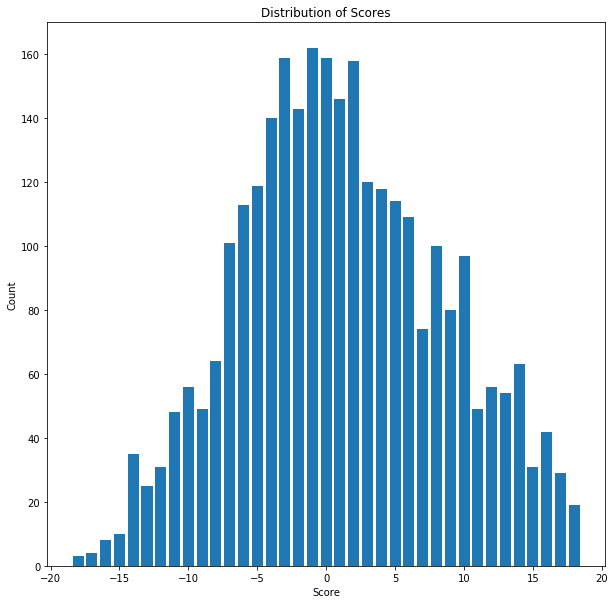

In [96]:
fig, ax = plt.subplots(figsize = (10,10))
ax.bar(distribution_of_values.index, distribution_of_values)
ax.set_ylabel('Count')
ax.set_xlabel('Score')
ax.set_title('Distribution of Scores')
tech_company_help.describe()
plt.figure(1)

As you can see from the graph above our data is very normally distributed, centering around a score of zero. This makes sense as zero represents an average score, not too good, not too bad. 

Now lets take a look at which variables are effective predictors of this final score. We know that the final score is made up of the summation of the individual scores of each column, using linear regression we want to see which column on its own best predicts a high score in other columns. For example does a company that scores highly for payed mental health leave on average also score highly in its other columns. Lets find out:

In [40]:
import statsmodels.api as sm

In [41]:
holder = {}
y = tech_company_help["summed_cols"] #Predicted column


for i in tech_company_help.columns: #Loop through columns to see which one scores the highest
    
    if i == "summed_cols": #Ignore the final column
        break  
        
    X = tech_company_help[i]
    model = sm.OLS(y, X).fit()
    predictions = model.predict(X)
    
    holder[i] = model.rsquared # We use r-squared as our evaluation metric

In [42]:
pd.Series(holder).sort_values()

tech_company        0.000000
treatment           0.186111
leave               0.187477
wellness_program    0.190402
coworkers           0.262628
anonymity           0.273046
seek_help           0.293013
supervisor          0.294179
care_options        0.298957
benefits            0.388871
dtype: float64

Based off of the linear model we can see that benifits is the best predictor of the total score, hence companies that provide mental health benefits as part of healthcare coverage typically score higher in all the other columns regarding the company's mental health culture.

Now lets explore the effectiveness of company size, as a predictor of the company's mental health culture:



In [43]:
#Distribution of responses by company size
fulldf_tech_only = fulldf.query('tech_company == 1.0')
fulldf_tech_only["num_employees"].value_counts()

4.0    1342
3.0     699
2.0     614
1.0     233
Name: num_employees, dtype: int64

In [44]:
y = tech_company_help["summed_cols"]
X = fulldf_tech_only["num_employees"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.rsquared

0.04805315954152156

As we can see from the r-squared score above, the size of the company isn't an effective metric to evaluate the final mental health score, especially when compaired to mental health benefits as part of healthcare coverage as a predictor. The size of the company is on a range of [1,2,3,4] whereas the benifits attribute is on a range of [-2,-1,0,1,2]. 

Maybe the range advantage benifits has makes it a better predictor. Lets see how the effectiveness of our attributes change when we evaluate on the binned "overall mental health experience":

In [45]:
#Replace strings with ints
overall = tech_company_help['overall_MH_experience'].replace("Positive", 1).replace("Negative", -1).replace("Neutral", 1)

In [46]:
y = overall
X = fulldf_tech_only["num_employees"]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.rsquared

0.032169104604203635

As you can see from the r-squared score above, the number of employees in a company still isn't a good predictor for a company's mental health rating.

If we are using "overall mental health experience" as our score however the question becomes more of a classification problem. Hence lets explore prediction through a random forest model:

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np


/Users/colerichmond/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [48]:
#Lets add the number of employees collumn back into our evaluation dataframe
tech_company_help['num_employees'] = fulldf_tech_only["num_employees"]

Lets start with predicting the summed score:

In [49]:
# Variables for use in our model
variables = ['anonymity', 'benefits', 'care_options', 'coworkers',
       'leave', 'seek_help', 'supervisor', 'treatment', 'wellness_program', 'num_employees']

tract_data = tech_company_help.dropna(subset=['summed_cols'])
X = tract_data[variables] # all the different predictor variables
y = tract_data['summed_cols'] # score column

#Splitting the data into a 67-33 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [50]:
#creating the model
regr = RandomForestRegressor(n_estimators=1000)

In [51]:
#fitting the model
regr.fit(X_train[variables], y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [52]:
# Checking R^2 error values on Train and Test sets
print(f"R^2 on Train set: {regr.score(X_train[variables], y_train)}")
print(f"R^2 on Test set: {regr.score(X_test[variables], y_test)}")

R^2 on Train set: 0.9978966703324097
R^2 on Test set: 0.9838491308835404


As we can see this model is very accurate, this makes sense because predicting the summed column is literally adding all of the columns together. We don't really care about this score, rather we care more about how the model weighted each individual attributein making its final prediction, this can be seen below:



In [53]:
# Which explanatory variables played the major roles?
#Here we can see the random forest classifier values wellness_program quite highly
print(f"""Importance of variables for decision making:\n {
            np.sort([[variables[i], regr.feature_importances_[i]] for i in range(len(variables))], axis=0)[::-1]}""")

Importance of variables for decision making:
 [['wellness_program' '0.3451014761712894']
 ['treatment' '0.18107833167693987']
 ['supervisor' '0.1415255456785429']
 ['seek_help' '0.08561975666432219']
 ['num_employees' '0.06952353260120661']
 ['leave' '0.06389211479256023']
 ['coworkers' '0.04858644851003181']
 ['care_options' '0.03426016598654506']
 ['benefits' '0.025600146507516453']
 ['anonymity' '0.004812481411045043']]


Clearly the model chose to weight wellness_program as quite important for evaluating the final score. Where as number of employees fell quite low. Interestingly enough benifits in this model is ranked second to last for its use in the random forest model, suggesting the benifits might be more effective as the only metric for predicting the mental health score of a company but when used in conjunction with other variables it becomes less important.

Now lets see how this changes when instead we are predicting whetehr the overall mental health experience of the company was possitive, neutral, or negative:



In [54]:
variables = ['anonymity', 'benefits', 'care_options', 'coworkers',
       'leave', 'seek_help', 'supervisor', 'treatment', 'wellness_program', "num_employees"]

#replace with numeric values
overall = tech_company_help['overall_MH_experience'].replace("Positive", 1).replace("Negative", -1).replace("Neutral", 1)

X = tract_data[variables]
y = overall

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [55]:
#creating the model
regr = RandomForestRegressor(n_estimators=1000)

In [56]:
#fitting the model
regr.fit(X_train[variables], y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [57]:
# Checking R^2 error values on Train and Test sets
print(f"R^2 on Train set: {regr.score(X_train[variables], y_train)}")
print(f"R^2 on Test set: {regr.score(X_test[variables], y_test)}")

R^2 on Train set: 0.9785444279936107
R^2 on Test set: 0.8798522893898456


As you can see the score on the test set dropped a little bit, this makes sense though as the model can't just add all the values together like in the previous example. In this case the model has to draw a correlation between a medium scoring company and whether it is classified as neutral or possitive, a cut off point we the user knows but where the model doesn't precisely know. In this case the model got pretty good at understanding that high scores are possitive and low scores are negative but likely struggled with the fringe cases such as whetehr an experience was negative or neutral ect.



In [58]:
# Which explanatory variables played the major roles?
#Here we can see the random forest classifier values wellness_program quite highly
print(f"""Importance of variables for decision making:\n {
            np.sort([[variables[i], regr.feature_importances_[i]] for i in range(len(variables))], axis=0)[::-1]}""")

Importance of variables for decision making:
 [['wellness_program' '0.2815067013816242']
 ['treatment' '0.14185485263157507']
 ['supervisor' '0.11373013207206409']
 ['seek_help' '0.08546636715618586']
 ['num_employees' '0.08213172505151253']
 ['leave' '0.0819511706706362']
 ['coworkers' '0.07328193666144837']
 ['care_options' '0.0700563288611046']
 ['benefits' '0.04848461970883014']
 ['anonymity' '0.021536165805018853']]


Here we can clearly see wellness_program is still the front runner in its contribution to the predictive success of the model. The order hasn't changed much however the model is now better distributing the predictive weight across other attributes. Although number off employees has seen a minor boost in its weighting, it still doesn't seem like an effecive metric for evaluating the mental health experience of employees within there company. Hence through our use of regression and classification models we can see that the size of the company (By number of employees) doesn't correlate to the quality of mental health experienced by the employees, rather metrics such as providing mental health benefits as part of healthcare coverage or discussing mental health as part of an employee wellness program.



## Glassdoor Sentiment Analysis

&nbsp;&nbsp;&nbsp;&nbsp; After taking a look at what people consider to be the most important features of a company as it related to their mental and physcial well-being, we thought it would be helpful to aquire reviews from a source that doesn't focus strictly on mental and physcial health. For us, that source is *Glassdoor*. This site allows both current and former employees to anonymously review their employers. We hope to use these reviews, in conjunction with their respective ratings, to interpret and classify the emotion within review text data using text analysis techniques seen in lecture. If we are able to identify patterns in the positive or negative sentiments of a company, we can then compare their respective ratings with the scores we found above to see if similarities exist across our various sources.

&nbsp;&nbsp;&nbsp;&nbsp; We'll begin by creating a function to extract the following features from an employee's review. Each review left by an employee looks something like this:
<br /> 
<br />


<div style="text-align:center"><img src="imgs/glassdoor_review.png" ,width="800" /></div>

<br /> 

&nbsp;&nbsp;&nbsp;&nbsp; In addition to the overall rating given to a company by an employee they can also leave sub-ratings for the following features:

- *Work/Life Balance*
- *Culture & Values*
- *Career Opportunities*
- *Compensation & Benefits*
- *Senior Management*

&nbsp;&nbsp;&nbsp;&nbsp; The following function (`review_scraper`) grabs all of the necessary attributes of a rating assuming they are available:

In [59]:
def review_scraper(url):
    
    # make global dataframe variable
    global data
    
    # initialize lists for ratings
    work_life_balance = []
    culture_values = []
    career_opportunities = []
    comp_benefits = []
    senior_management = [] 
    
    # make glassdoor request
    hdr = {'User-Agent': 'Mozilla/5.0'}
    req = Request(url,headers=hdr)
    page = urlopen(req)
    soup = BeautifulSoup(page, 'html.parser')
    
    # grab overall rating
    value_title = soup.find_all('span', attrs = {'class':'value-title'})
    value_title_clean = []
    for x in value_title:
        value_title_clean.append(float(x['title']))
    
    # grab sub-ratings
    sub_ratings = soup.find_all('div', attrs = {'class':'subRatings module stars__StarsStyles__subRatings'})
    for subrating in sub_ratings:
        rating_cat=subrating.find_all('div', attrs = {'class':'minor'})
        rating_cat_clean = []
        
        for x in rating_cat:
            rating_cat_clean.append(x.text.replace('/', " "))
            
        rating_val=subrating.find_all('span', attrs = {'class':'gdBars gdRatings med'})
        rating_val_clean = []
        
        for x in rating_val:
            rating_val_clean.append(float(x['title']))
        
        # check for 'Work Life Balance' rating
        try:
            index = rating_cat_clean.index('Work Life Balance')
        except ValueError:
            index = -1
        rating_value = work_life_balance.append(None) if index == -1 else work_life_balance.append(float(rating_val_clean[index]))
        
        # check for 'Culture & Values' rating
        try:
            index = rating_cat_clean.index('Culture & Values')
        except ValueError:
            index = -1
        rating_value = culture_values.append(None) if index == -1 else culture_values.append(float(rating_val_clean[index]))
        
        # check for 'Career Opportunities' rating
        try:
            index = rating_cat_clean.index('Career Opportunities')
        except ValueError:
            index = -1
        rating_value = career_opportunities.append(None) if index == -1 else career_opportunities.append(float(rating_val_clean[index]))
        
        # check for 'Compensation and Benefits' rating
        try:
            index = rating_cat_clean.index('Compensation and Benefits')
        except ValueError:
            index = -1
        rating_value = comp_benefits.append(None) if index == -1 else comp_benefits.append(float(rating_val_clean[index]))
        
        # check for 'Senior Management' rating
        try:
            index = rating_cat_clean.index('Senior Management')
        except ValueError:
            index = -1
        rating_value = senior_management.append(None) if index == -1 else senior_management.append(float(rating_val_clean[index]))

    # grab pros and cons given in each rating
    pros_and_cons = soup.find_all('p', attrs = {'class':"mt-0 mb-xsm v2__EIReviewDetailsV2__bodyColor v2__EIReviewDetailsV2__lineHeightLarge "})
    pros = []
    cons = []
    for i, x in zip(range(len(pros_and_cons)), pros_and_cons):
        if (i % 2) == 0:
            pros.append(x.text) 
        else:
            cons.append(x.text) 
            
    interim_data = pd.DataFrame(list(zip(value_title_clean, 
                                         work_life_balance, 
                                         culture_values, 
                                         career_opportunities, 
                                         comp_benefits, 
                                         senior_management, 
                                         pros, 
                                         cons)), columns = ['overall_rating', 
                                                            'work_life_balance', 
                                                            'culture_values', 
                                                            'career_opportunities', 
                                                            'comp_benefits', 
                                                            'senior_management', 
                                                            'pros', 
                                                            'cons'])
    
    data=data.append(interim_data)
    
    time.sleep(30)
    
    return data

&nbsp;&nbsp;&nbsp;&nbsp; Additionally, we created the following function to grab the most common words from the set of reviews.

In [60]:
def top_words(data, column, count):
    
    series = data[column].str.split()
    
    corpus = [st for row in series for st in row]
    
    no_cap = [word.lower().strip() for word in corpus]
    
    filtered = [word for word in no_cap if word not in stoplist]
    
    table = str.maketrans('', '', string.punctuation)
    
    stripped = [w.translate(table) for w in filtered]
    
    counts = Counter(stripped).most_common(count)
    
    return counts

In [61]:
# for later use in viz
overall_rating_list = []
work_life_balance_list = []
culture_values_list = []
career_opportunities_list = []
comp_benefits_list = []
senior_management_list = []

&nbsp;&nbsp;&nbsp;&nbsp; We have also created a function to display summary statistics for each company we analyze.

In [62]:
def summary_stats(company, data):
    
    overall_rating_mean = data.overall_rating.mean()
    overall_rating_list.append(overall_rating_mean)
    
    work_life_balance_mean = data.work_life_balance.mean()
    work_life_balance_list.append(work_life_balance_mean)
    
    culture_values_mean = data.culture_values.mean()
    culture_values_list.append(culture_values_mean)
    
    career_opportunities_mean = data.career_opportunities.mean()
    career_opportunities_list.append(career_opportunities_mean)
    
    comp_benefits_mean = data.comp_benefits.mean()
    comp_benefits_list.append(comp_benefits_mean)
    
    senior_management_mean = data.senior_management.mean()
    senior_management_list.append(senior_management_mean)
    
    pros_summary = top_words(data, 'pros', 10)
    
    cons_summary = top_words(data, 'cons', 10)
    
    print(company + ' Summary Statistics: \n \n \
          Overall Rating: ' + str(round(overall_rating_mean, 2)) + '\n \
          Work/Life Balance: ' + str(round(work_life_balance_mean, 2)) + '\n \
          Culture Values: ' + str(round(culture_values_mean, 2)) + '\n \
          Career Opportunities: ' + str(round(career_opportunities_mean, 2)) + '\n \
          Company Benefits: ' + str(round(comp_benefits_mean, 2)) + '\n \
          Senior Management: ' + str(round(senior_management_mean, 2)) + '\n')
    
    print('Top `Pros`:')
    
    print([tup[0] for tup in top_words(data, 'pros', 10)])
    
    print('\n')
    
    print('Top `Cons`:')
    
    print([tup[0] for tup in top_words(data, 'cons', 10)])

&nbsp;&nbsp;&nbsp;&nbsp; At this point, we're ready to start looking at reviews of different companies. We'll see if attributes such as the size of company or benefits they offer appear in the reviews and what impact they have on the given ratings. For the sake of runtime, we'll check only the fist ten pages of reviews which each conain ten reviews. 

##### Amazon

**Size**: 10,000+ Employees
<br \>
**Revenue**: $10+ Billion (USD) / Year
<br \>
**Industry**: Internet

In [63]:
data = pd.DataFrame(columns = ['overall_rating', 
                               'work_life_balance', 
                               'culture_values', 
                               'career_opportunities', 
                               'comp_benefits', 
                               'senior_management', 
                               'pros', 
                               'cons'])

for x in range(1,11):
    
    url = 'https://www.glassdoor.com/Reviews/Amazon-Reviews-E6036_P'+str(x)+'.htm'
    
    review_scraper(url)
    
    data = data.reset_index(drop=True)

In [64]:
data.head(5)

,overall_rating,work_life_balance,culture_values,career_opportunities,comp_benefits,senior_management,pros,cons
0,3.9,3.0,5.0,5.0,4.0,4.0,amazing company and growth opportunities,"fast-paced and high-intensity environment, you..."
1,5.0,4.0,5.0,5.0,5.0,5.0,"Really smart people, a lot of opportunity for ...",You have to be self motivated. NO ONE will hol...
2,5.0,3.0,3.0,3.0,4.0,4.0,"Jeff Bezos and his ""S-Team"" are brilliant and ...","The management process is abusive, and I'm cur..."
3,3.0,3.0,4.0,5.0,5.0,5.0,- You can learn a lot very quickly in a very s...,"- Can be overwhelming, very steep learning cur..."
4,5.0,4.0,5.0,5.0,5.0,5.0,"I've been at Amazon for a month now, and I've ...","No cons, so far - seriously. Like I said, I'm ..."


*Summary Statistics*

In [65]:
summary_stats('Amazon', data)

Amazon Summary Statistics: 
 
           Overall Rating: 4.46
           Work/Life Balance: 3.86
           Culture Values: 4.21
           Career Opportunities: 4.41
           Company Benefits: 4.34
           Senior Management: 3.76

Top `Pros`:
['work', 'great', 'good', '', 'company', 'pay', 'people', 'benefits', 'amazon', 'growth']


Top `Cons`:
['work', 'get', 'hours', 'company', 'hard', '', 'long', 'job', 'people', 'time']


##### Facebook

**Size**: 10,000+ Employees
<br \>
**Revenue**: $10+ Billion (USD) / Year
<br \>
**Industry**: Internet

In [66]:
data = pd.DataFrame(columns = ['overall_rating', 
                               'work_life_balance', 
                               'culture_values', 
                               'career_opportunities', 
                               'comp_benefits', 
                               'senior_management', 
                               'pros', 
                               'cons'])

for x in range(1,11):
    
    url = 'https://www.glassdoor.com/Reviews/Facebook-Reviews-E40772_P'+str(x)+'.htm'
    
    review_scraper(url)
    
    data = data.reset_index(drop=True)

In [67]:
data.head(5)

,overall_rating,work_life_balance,culture_values,career_opportunities,comp_benefits,senior_management,pros,cons
0,4.4,5.0,5.0,5.0,5.0,5.0,I have worked at lots of other companies and t...,Sometimes there are just too many things going...
1,5.0,4.0,4.0,5.0,5.0,4.0,Thank you for this feedback. We're very happy ...,"Perks, they care about employees even when the..."
2,5.0,5.0,5.0,5.0,5.0,5.0,"Every company has a few downsides, but they ca...",- Incredible benefits \r\n- Excellent compensa...
3,5.0,3.0,5.0,5.0,4.0,5.0,- If you don't learn to make the work life bal...,Thank you for the feedback. From the Life@ ben...
4,5.0,5.0,5.0,5.0,5.0,5.0,- Very compassionate leadership team. They tru...,- Most of the tools used by Facebook are inter...


*Summary Statistics*

In [68]:
summary_stats('Facebook', data)

Facebook Summary Statistics: 
 
           Overall Rating: 4.34
           Work/Life Balance: 3.86
           Culture Values: 4.25
           Career Opportunities: 4.27
           Company Benefits: 4.71
           Senior Management: 3.97

Top `Pros`:
['', 'work', 'great', 'benefits', 'good', 'company', 'people', 'perks', 'culture', 'team']


Top `Cons`:
['', 'work', 'team', 'people', 'company', 'sometimes', 'time', 'facebook', 'much', 'balance']


##### Microsoft

**Size**: 10,000+ Employees
<br \>
**Revenue**: $10+ Billion (USD) / Year
<br \>
**Industry**: Computer Hardware & Software

In [69]:
data = pd.DataFrame(columns = ['overall_rating', 
                               'work_life_balance', 
                               'culture_values', 
                               'career_opportunities', 
                               'comp_benefits', 
                               'senior_management', 
                               'pros', 
                               'cons'])

for x in range(1,11):
    
    url = 'https://www.glassdoor.com/Reviews/Microsoft-Reviews-E1651_P'+str(x)+'.htm'
    
    review_scraper(url)
    
    data = data.reset_index(drop=True)

In [70]:
data.head(5)

,overall_rating,work_life_balance,culture_values,career_opportunities,comp_benefits,senior_management,pros,cons
0,4.2,4.0,3.0,5.0,5.0,4.0,"Wide range of opportunities, overall compensat...",Large company and has some silo behavior. Not ...
1,5.0,4.0,2.0,2.0,4.0,NaN,"1. If you love tech, this is a great place. ...",Brand on Your Resume: After many years of los...
2,4.0,5.0,5.0,2.0,5.0,1.0,"Flexibility , good culture, benefits, good mo...","Product mindset , too much structure, policita..."
3,5.0,4.0,4.0,4.0,4.0,4.0,This company is a good place to work for,I don't see any cons while working here
4,5.0,4.0,4.0,3.0,3.0,3.0,Culture is awesome and energizing,Slow career growth if in the wrong group


*Summary Statistics*

In [71]:
summary_stats('Microsoft', data)

Microsoft Summary Statistics: 
 
           Overall Rating: 4.35
           Work/Life Balance: 4.11
           Culture Values: 4.21
           Career Opportunities: 4.24
           Company Benefits: 4.24
           Senior Management: 3.9

Top `Pros`:
['great', 'work', 'good', 'benefits', 'culture', 'balance', 'company', 'life', '', 'pay']


Top `Cons`:
['work', '', 'slow', 'sometimes', 'get', 'make', 'management', 'politics', 'still', 'career']


##### Viasat

**Size**: 5001 to 10000 Employees
<br \>
**Revenue**: \$1 to \$2 Billion (USD) / Year
<br \>
**Industry**: Telecommunications Services

In [72]:
data = pd.DataFrame(columns = ['overall_rating', 
                               'work_life_balance', 
                               'culture_values', 
                               'career_opportunities', 
                               'comp_benefits', 
                               'senior_management', 
                               'pros', 
                               'cons'])

for x in range(1,11):
    
    url = 'https://www.glassdoor.com/Reviews/Viasat-Reviews-E5500_P'+str(x)+'.htm'
        
    review_scraper(url)
    
    data = data.reset_index(drop=True)

In [73]:
data.head(5)

,overall_rating,work_life_balance,culture_values,career_opportunities,comp_benefits,senior_management,pros,cons
0,4.4,5.0,5.0,5.0,5.0,5.0,"The company culture is unbeatable, executive l...",Viasat sets the standard high regarding their ...
1,5.0,5.0,5.0,5.0,4.0,NaN,Kudos for sharing your Viasat experience! We p...,Flexible work times.\r\nSmart people to work w...
2,5.0,5.0,2.0,2.0,4.0,1.0,Ambiguity of team structures/responsibilities,Thank you for taking the time to support us by...
3,2.0,5.0,5.0,5.0,5.0,5.0,"Laid back, some coworkers are nice, good benefits","Poor pay, management plays favorites, company ..."
4,2.0,4.0,4.0,5.0,4.0,4.0,Good company culture and benefits.,Ageism seems to be a growing problem. Company ...


*Summary Statistics*

In [74]:
summary_stats('Viasat', data)

Viasat Summary Statistics: 
 
           Overall Rating: 4.38
           Work/Life Balance: 4.57
           Culture Values: 4.53
           Career Opportunities: 4.11
           Company Benefits: 4.28
           Senior Management: 4.07

Top `Pros`:
['work', 'great', 'company', 'culture', 'employees', 'viasat', 'benefits', 'good', 'people', 'balance']


Top `Cons`:
['work', 'company', 'viasat', 'great', 'employees', 'people', 'culture', 'time', 'management', 'opportunities']


##### ServiceNow

**Size**: 5001 to 10000 Employees
<br \>
**Revenue**: \$2 to \$5 Billion (USD) / Year
<br \>
**Industry**: Enterprise Software & Network Solutions

In [75]:
data = pd.DataFrame(columns = ['overall_rating', 
                               'work_life_balance', 
                               'culture_values', 
                               'career_opportunities', 
                               'comp_benefits', 
                               'senior_management', 
                               'pros', 
                               'cons'])

for x in range(1,11):
    
    url = 'https://www.glassdoor.com/Reviews/ServiceNow-Reviews-E403326_P'+str(x)+'.htm'
        
    review_scraper(url)
    
    data = data.reset_index(drop=True)

In [76]:
data.head(5)

,overall_rating,work_life_balance,culture_values,career_opportunities,comp_benefits,senior_management,pros,cons
0,3.5,5.0,5.0,5.0,5.0,5.0,"1) ServiceNow hires great people, they're ""adu...",A lot of people who've been here 3-5+ years st...
1,5.0,5.0,5.0,5.0,4.0,5.0,We are grateful for - and humbled by - your re...,"Teamwork, Resources and Management support. Wh..."
2,5.0,5.0,5.0,5.0,5.0,5.0,Knowledge is spread across the organization wh...,Unlimited vacation/sick time\r\nUnlimited work...
3,5.0,4.0,5.0,5.0,4.0,5.0,Some departments are treated better than others,Love how humble the leaders and people are. Th...
4,5.0,2.0,1.0,5.0,4.0,2.0,It's high growth and fast-paced (which creates...,"Good pay, good work environment, and opportuni..."


*Summary Statistics*

In [77]:
summary_stats('ServiceNow', data)

ServiceNow Summary Statistics: 
 
           Overall Rating: 3.42
           Work/Life Balance: 3.36
           Culture Values: 3.27
           Career Opportunities: 3.34
           Company Benefits: 3.76
           Senior Management: 3.11

Top `Pros`:
['great', 'company', '', 'work', 'people', 'culture', 'servicenow', 'team', 'time', 'like']


Top `Cons`:
['work', 'people', '', 'company', 'good', 'management', 'time', 'environment', 'employees', 'team']


##### Lytx

**Size**: 5001 to 10000 Employees
<br \>
**Revenue**: \$100 to \$500 Million (USD) / Year
<br \>
**Industry**: Computer Hardware & Software

In [78]:
data = pd.DataFrame(columns = ['overall_rating', 
                               'work_life_balance', 
                               'culture_values', 
                               'career_opportunities', 
                               'comp_benefits', 
                               'senior_management', 
                               'pros', 
                               'cons'])

for x in range(1,11):
    
    url = 'https://www.glassdoor.com/Reviews/Lytx-Reviews-E813859_P'+str(x)+'.htm'
    
    review_scraper(url)
    
    data = data.reset_index(drop=True)

In [79]:
data.head(5)

,overall_rating,work_life_balance,culture_values,career_opportunities,comp_benefits,senior_management,pros,cons
0,3.9,5.0,5.0,5.0,5.0,5.0,Extremely Family oriented company A+++,I have nothing to say
1,5.0,4.0,5.0,4.0,4.0,3.0,Thank you for your review. We’re glad you like...,"Unlimited PTO, work from home one day a week, ..."
2,4.0,4.0,4.0,3.0,3.0,3.0,"The commute to UTC area is terrible, some peop...",We appreciate your feedback. You mentioned som...
3,3.0,4.0,5.0,4.0,5.0,4.0,Great culture and option to work from home. Ro...,A lot of learning curve to grasp. Inconsisten...
4,4.0,4.0,4.0,3.0,3.0,4.0,"We agree, the culture is great, a flexible wor...","Good benefits, flexible PTO, nice staff."


*Summary Statistics*

In [80]:
summary_stats('Lytx', data)

Lytx Summary Statistics: 
 
           Overall Rating: 3.47
           Work/Life Balance: 3.81
           Culture Values: 3.56
           Career Opportunities: 3.32
           Company Benefits: 3.61
           Senior Management: 3.32

Top `Pros`:
['', 'work', 'great', 'people', 'nice', 'lytx', 'company', 'team', 'time', 'good']


Top `Cons`:
['', 'company', 'work', 'great', 'employees', 'team', 'culture', 'people', 'lytx', 'good']


In [81]:
companies = ['Amazon', 'Facebook', 'Micorsoft', 'Viasat', 'ServiceNow', 'Lytx']

df = pd.DataFrame(list(zip(companies, 
                           overall_rating_list, 
                           work_life_balance_list, 
                           culture_values_list,
                           career_opportunities_list, 
                           comp_benefits_list, 
                           senior_management_list)), 
                  columns=['company', 
                           'overall_rating', 
                           'work_life_balance', 
                           'culture_values', 
                           'career_opportunities', 
                           'comp_benefits', 
                           'senior_management']).set_index('company') 

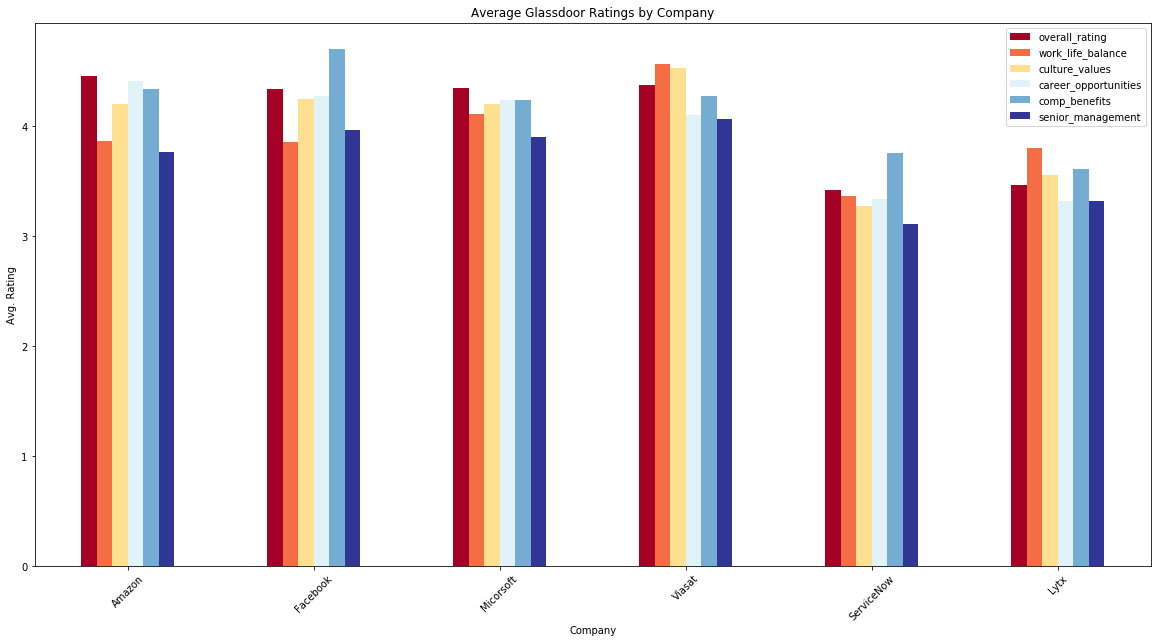

In [83]:
df[['overall_rating', 'work_life_balance','culture_values','career_opportunities','comp_benefits', 'senior_management']].plot(kind='bar', rot=45, figsize=(20,10), cmap='RdYlBu')

plt.ylabel('Avg. Rating')
plt.xlabel('Company')
plt.title('Average Glassdoor Ratings by Company')

plt.show(1)

&nbsp;&nbsp;&nbsp;&nbsp; From our analysis of *Glassdoor*, it's clear that larger-sized companies (e.g. `Amazon`, `Facebook`, `Microsoft`) receive higher ratings compared to companies that are a bit smaller (e.g. `Viasat`, `ServiceNow`, `Lytx`). One interesting thing to note about the sub-ratings is that many employees gave high marks for `comp_benefits` irregardless of their scores for any of the other categories. This lines up with what we found in the `pros` and `cons` sections of the reviews. For companies like `Amazon`, `Facebook`, `Microsoft`, and `Viasat` we saw `benefits` and/or `perks` show up as some of the most commonly used words in the `pros` section. Conversely, for the smaller companies we saw words such as `balance` and `culture` show up as some of the most commonly used `cons`. 

&nbsp;&nbsp;&nbsp;&nbsp; We can speculate as to why people did or did not enjoy their time as an employee at these companies, but these common themes provide us with a nice view into what worklife looks like at these organizations. The other thing to make note of is that some of these reviews come from people who technically work for a company in the technology sector but may not fulfill a technical role. You can see an example of this in the image used at the beginning of this analysis that was pulled from a review provided by a *Warehouse Associate* at `Amazon`. Nevertheless, people seem to enjoy the benefits that go beyond the satisfaction that their actual job provides them with.

# Ethics and Privacy

Mental Health is a taboo subject that is only currently starting to be less stigmatized. We wanted to keep this in mind when we were looking at the data to maintain anonymity. We wanted to avoid analyzing names, addresses, and other things that are deemed as personal information to the individuals partaking in the survey, so we solely focused on data that was self-reported..
 
Our OSMI data anonymized the data by noting the individuals' features like their gender, age, and the country their company was located in. Our Glassdoor data anonymized the data by considering only the individuals responses to a survey rather than their personal features as well, like the OSMI data. With a combination of the data, we were thus able to analyze those individuals' feedback anonymously while taking into consideration any confounding variables. 
 
We also avoided naming companies to prevent any bias that could impact their image. From the data, we analyzed the individual person’s feedback, taking into consideration whether they were a part of bigger companies vs. smaller companies in addition to the mental wellness programs provided by those companies.

# Conclusion & Discussion

Initially, our team had a difficult time quantifying mental illness in the different companies analyzed, so we decided to look at the extent of mental awareness programs provided by companies. We considered different attributes that the different companies had, like where those companies were placed as well as the number of females versus males in addition to their ages and if they were self employed. 
 
Our hypothesis focused on looking at how large companies and small companies differed for mental health in their employees, yet surveys showed that it was the extent of mental wellness programs that made a large impact on mental health. Overall, we noticed that people respond more positively about mental health based on the amount of mental health programs that a company provided for its workers rather than how large the companies were. 

# Team Contributions

Andrey Pristinsky and Mariam Qader worked on cleaning up the data and putting it all together, Cole Richmond and Braden Riggs worked on visualizing the data and analysis, and Taly Yukelson worked on the final written analysis. 